In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
df1= pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')

In [5]:
df1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
#convert date datatype to date time
df1['Date'] = pd.to_datetime(df1['Date'])

In [8]:
df1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [9]:
#splitting sequential data into test and train
train_size=int(len(df1)*0.8)
train_data=df1[:train_size].iloc[:,:2]
test_data=df1[train_size:].iloc[:,:2]
print(len(train_data),len(test_data))

1353 339


In [10]:
train_data.head()

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000


In [11]:
#converting data to numpy array
#train_array=train_data['Open'].values
#test_array=test_data['Open'].values
train_array=np.array(train_data['Open'])
test_array=np.array(test_data['Open'])

In [12]:
len(train_array),len(test_array)

(1353, 339)

In [13]:
#reshaping the array
train_array=train_array.reshape(-1,1)
test_array=test_array.reshape(-1,1)
print(train_array.shape,test_array.shape)

(1353, 1) (339, 1)


In [14]:
#scaling the feature
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_array=scaler.fit_transform(train_array)
test_array=scaler.transform(test_array)
print(train_array)
print(train_array.shape,test_array.shape)

[[0.01053291]
 [0.03553936]
 [0.03262991]
 ...
 [0.79018888]
 [0.7986226 ]
 [0.76359882]]
(1353, 1) (339, 1)


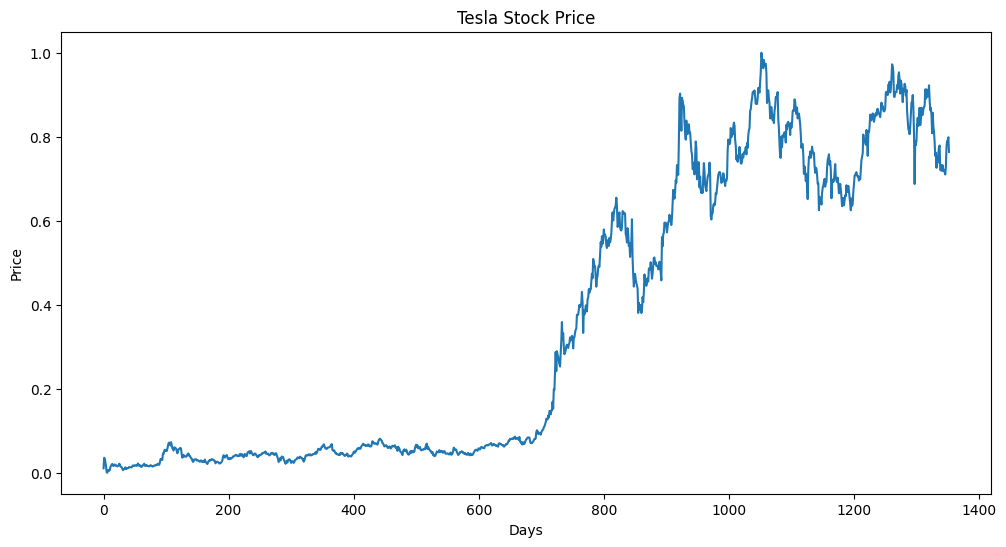

In [15]:
#plotting train data

plt.figure(figsize=(12,6))
plt.plot(train_array)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Tesla Stock Price')
plt.show()

In [16]:
#creating y train and x train for prediction
x_train=[]
y_train=[]
for i in range(50,len(train_array)):
  x_train.append(train_array[i-50:i,0])
  y_train.append(train_array[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape,y_train.shape)




(1303, 50) (1303,)


In [17]:
x_test=[]
y_test=[]

for i in range(50,len(test_array)):
  x_test.append(test_array[i-50:i,0])
  y_test.append(test_array[i,0])

In [18]:
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape,y_test.shape)

(289, 50) (289,)


In [19]:
#final reshaping of data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1303, 50, 1)


In [20]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(289, 50, 1)


In [21]:
from keras.models import Sequential
from keras.layers import LSTM,SimpleRNN,Dense,BatchNormalization,Dropout

In [22]:
model1=Sequential()
model1.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))


model1.add(Dropout(0.2))

model1.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))


model1.add(Dropout(0.2))

model1.add(SimpleRNN(units=1,activation='tanh'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model1.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [24]:
history=model1.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - loss: 0.2285 - mae: 0.3730
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0496 - mae: 0.1745
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0299 - mae: 0.1353
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0209 - mae: 0.1126
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0181 - mae: 0.0976
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - mae: 0.0896
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100 - mae: 0.0736
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - mae: 0.0739
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0103 - mae: 0.0727
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086 - mae: 0.0652


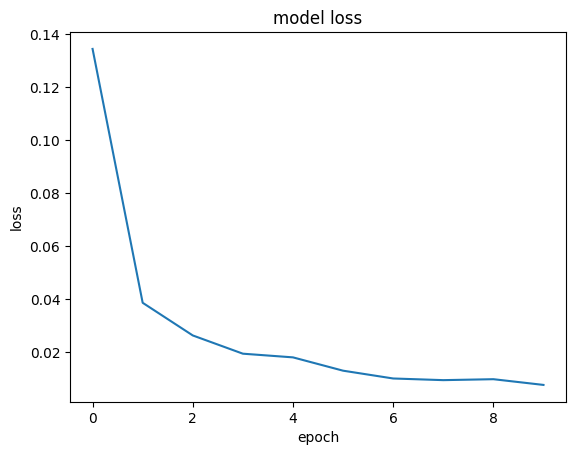

In [25]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Text(0, 0.5, 'accuracy')

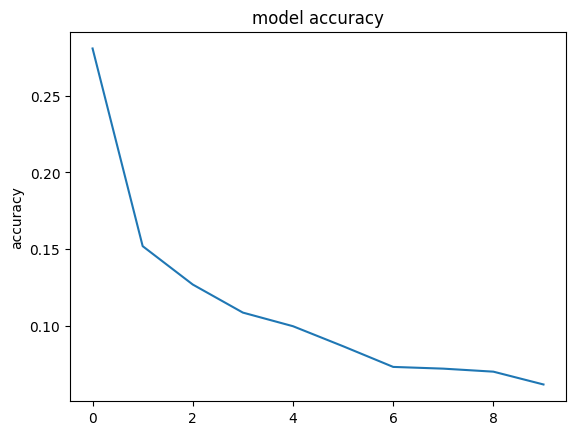

In [26]:
plt.plot(history.history['mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [27]:
y_pred=model1.predict(x_train)
y_pred=scaler.inverse_transform(y_pred)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [28]:
y_train=scaler.inverse_transform(y_train.reshape(-1,1))

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_train,y_pred)
mae=mean_absolute_error(y_train,y_pred)

print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)

Mean Squared Error: 240.75695554486214
Mean Absolute Error: 11.346559393946709


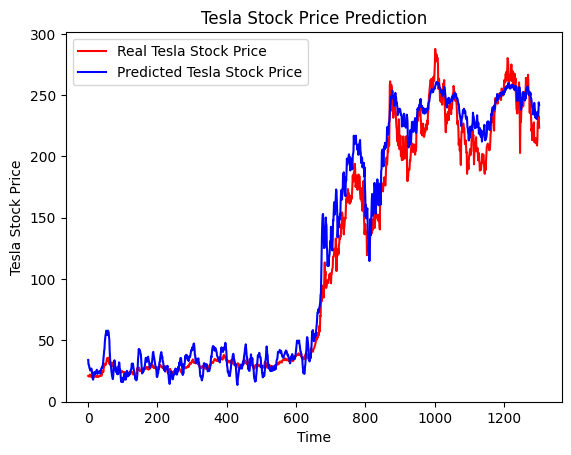

In [30]:
plt.plot(y_train,color='red',label='Real Tesla Stock Price')
plt.plot(y_pred,color='blue',label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [31]:
y_pred_test=model1.predict(x_test)
y_pred_test=scaler.inverse_transform(y_pred_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [32]:
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

In [33]:
mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)

Mean Absolute Error: 15.856688699066687
Mean Squared Error: 349.3297886457832


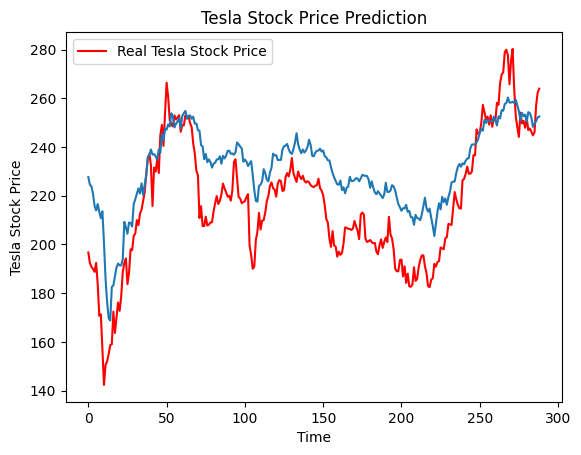

In [34]:
plt.plot(y_test,color='red',label='Real Tesla Stock Price')
plt.plot(y_pred_test)
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

Stock prediction With LSTM

In [35]:
model2=Sequential()

model2.add(LSTM(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units=50,activation='tanh',return_sequences=True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=50,activation='tanh',return_sequences=True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=1,activation='tanh'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
y_train=scaler.fit_transform(y_train)
print(y_train)


[[0.0041452 ]
 [0.0032116 ]
 [0.00373441]
 ...
 [0.78725068]
 [0.79580251]
 [0.76028825]]


In [37]:
model2.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [38]:
history1=model2.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0694 - mae: 0.1790
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0031 - mae: 0.0393
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028 - mae: 0.0359
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028 - mae: 0.0332
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0027 - mae: 0.0326
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024 - mae: 0.0319
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024 - mae: 0.0303
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023 - mae: 0.0313
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - mae: 0.0274
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024 - mae: 0.0315


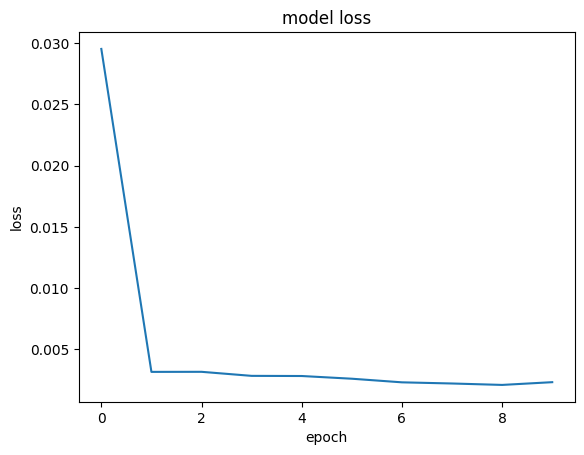

In [39]:
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Text(0, 0.5, 'accuracy')

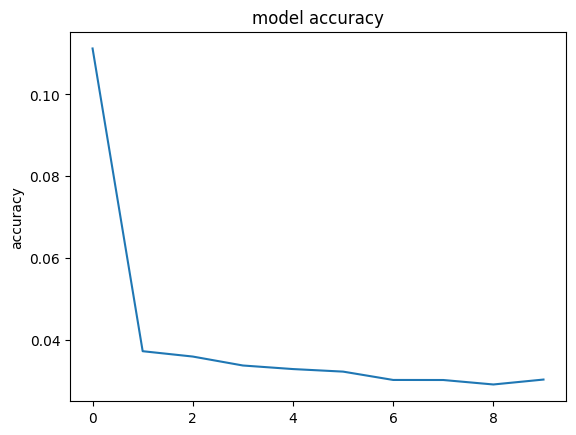

In [40]:
plt.plot(history1.history['mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [41]:
y_pred_1=model2.predict(x_train)
y_pred_1=scaler.inverse_transform(y_pred_1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [42]:
y_train=scaler.inverse_transform(y_train.reshape(-1,1))

In [43]:
mae=mean_absolute_error(y_train,y_pred_1)
mse=mean_squared_error(y_train,y_pred_1)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)

Mean Absolute Error: 6.800235153903309
Mean Squared Error: 108.91479440665641


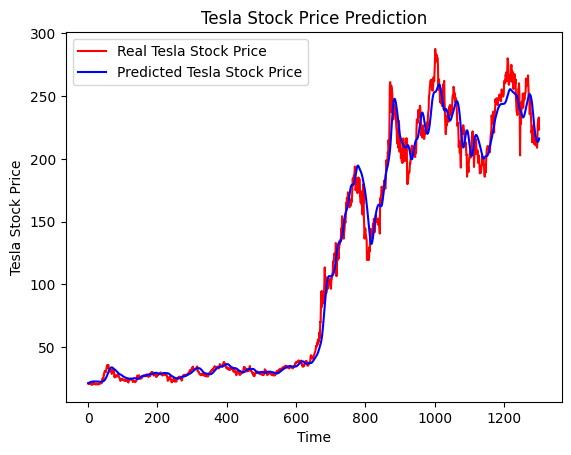

In [44]:
plt.plot(y_train,color='red',label='Real Tesla Stock Price')
plt.plot(y_pred_1,color='blue',label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [45]:
y_pred_test=model2.predict(x_test)
y_pred_test=scaler.inverse_transform(y_pred_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [47]:
mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)

Mean Absolute Error: 11.550689812837911
Mean Squared Error: 212.299856338655


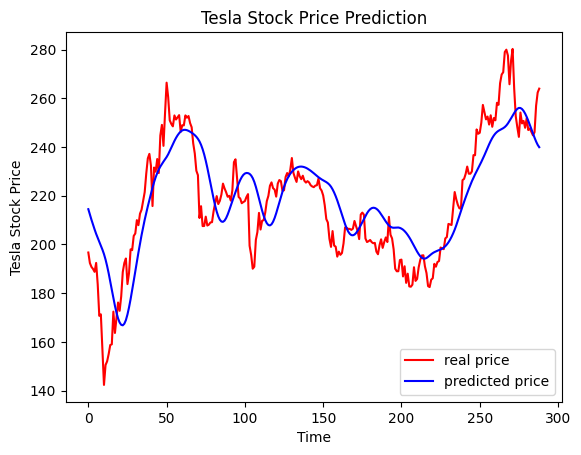

In [48]:
plt.plot(y_test,color='red',label='Real tesla stock price')
plt.plot(y_pred_test,color='blue',label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend(['real price','predicted price'])
plt.show()